<a href="https://colab.research.google.com/github/pranilbasu/ML-Projects/blob/main/Sales_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Data Analysis

In [ ]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales_data = pd.read_csv('all_data.csv')  #dataset

In [ ]:
sales_data.shape

(186850, 6)

In [ ]:
sales_data.head(7) # preview of data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"


In [ ]:
sales_data.isnull().sum() # null values

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
sales_data = sales_data.dropna() # removal of null values

In [ ]:
def month(x):
    return x.split('/')[0]  # only the month values are taken
sales_data['Month'] = sales_data['Order Date'].apply(month)

In [ ]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [ ]:
sales_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [ ]:
Od = sales_data['Month'] == 'Order Date'  
sales_data = sales_data[~Od]  # remove 'order date' from Month

In [ ]:
sales_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [ ]:
sales_data['Month']= sales_data['Month'].astype(int)  # conversion of Month values into integers

In [ ]:
sales_data['Price Each'] = sales_data['Price Each'].astype(float)  # conversion of Price each values into float

In [ ]:
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype(int) 

In [ ]:
sales_data['sales']= sales_data['Quantity Ordered']*sales_data['Price Each']
sales_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Sales value variation with Months

In [ ]:
sales_data.groupby('Month')['sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

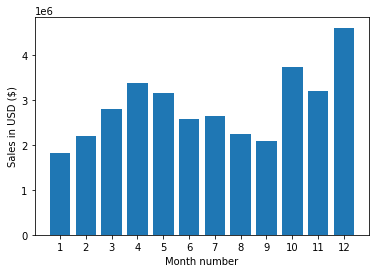

In [ ]:
months=range(1,13)
plt.bar(months, sales_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### Order variation with Cities

In [ ]:
def city(x):
    return x.split(',')[1]

sales_data['city'] = sales_data['Purchase Address'].apply(city)

In [ ]:
sales_data.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

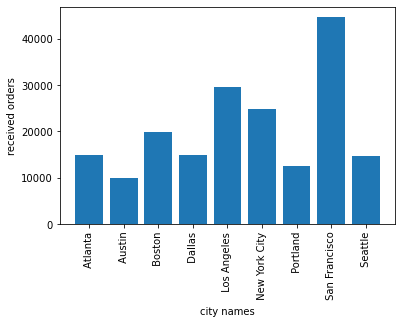

In [ ]:
plt.bar(sales_data.groupby('city')['city'].count().index, sales_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

### Sale of Products

<AxesSubplot:xlabel='Product'>

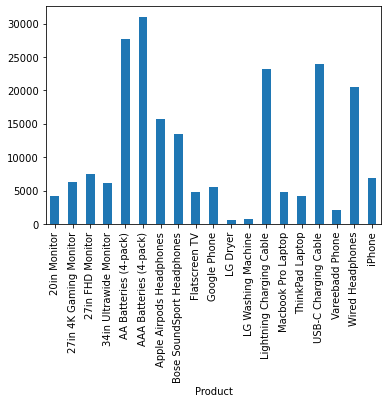

In [ ]:
sales_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [ ]:
sales_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [ ]:
products = sales_data.groupby('Product')['Quantity Ordered'].sum().index
quantity = sales_data.groupby('Product')['Quantity Ordered'].sum()
prices = sales_data.groupby('Product')['Price Each'].mean()

C:\Users\prani\AppData\Local\Temp\ipykernel_17576\93104940.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size= 10)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

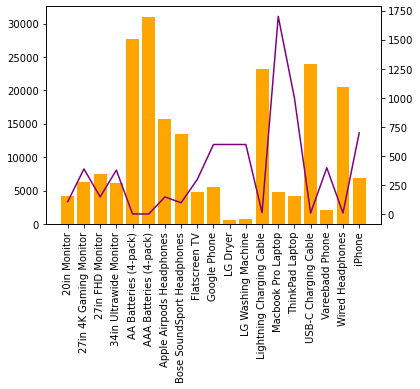

In [ ]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='orange')
ax2.plot(products, prices, 'purple')
ax1.set_xticklabels(products, rotation='vertical', size= 10)